<a href="https://colab.research.google.com/github/chinmay002/Tensorflow_cert_progress/blob/main/TimeSeries_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-05-26 23:51:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-05-26 23:51:33 (5.54 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf




In [8]:
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col = ['Date'])

In [9]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [11]:
df.shape

(2787, 5)

In [13]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)':'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Prive of Bitcoin from 1 Oct 2014 to 18 May 2021')

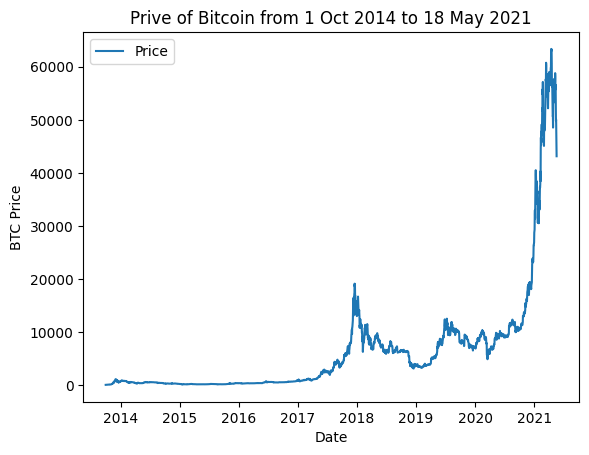

In [16]:
sns.lineplot(bitcoin_prices)
plt.ylabel('BTC Price')
plt.title('Prive of Bitcoin from 1 Oct 2014 to 18 May 2021')

In [24]:
import csv
import datetime
timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as f:
  csv_reader = csv.reader(f,delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.datetime.strptime(line[1],'%Y-%m-%d'))  
    btc_price.append(float(line[2]))

['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']


# Create train and test sets of out time series data

In [28]:
bitcoins = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
bitcoins[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [37]:
split_size = int(0.8*len(prices))


X_train,y_train = bitcoins[:split_size],prices[:split_size]
X_test,y_test = bitcoins[split_size:],prices[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

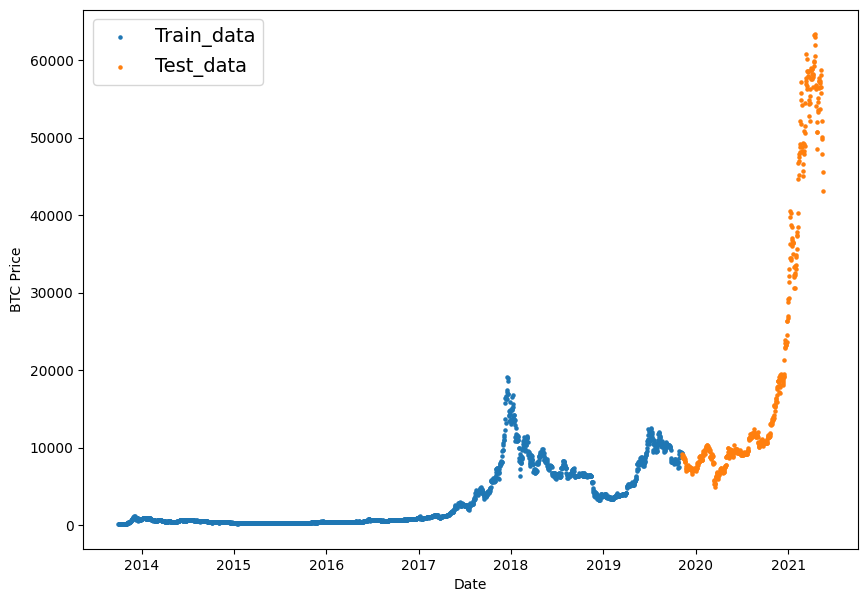

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(X_train , y_train,s = 5,label = 'Train_data')
plt.scatter(X_test , y_test ,s =5,label = 'Test_data')
plt.xlabel("Date")
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

In [49]:
def plot_time_series(timesteps,values,format = '.',start = 0,end = None,label = None):
  
  #plt.figure(figsize= (10,7))
  plt.plot(timesteps[start:end],values[start:end],format ,label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)  


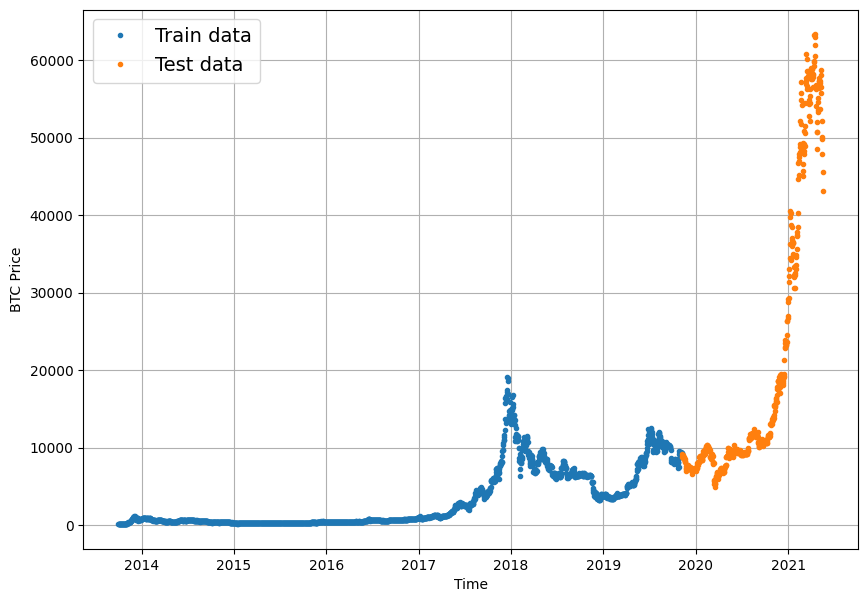

In [50]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_train,values = y_train,label = "Train data")
plot_time_series(timesteps = X_test,values = y_test,label = "Test data")

#Model 0 Naive Model

* **Horizon** = number of timesteps into the future we're goinf to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**


$$\hat{y}_{t} = y_{t-1}$$


In [53]:
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

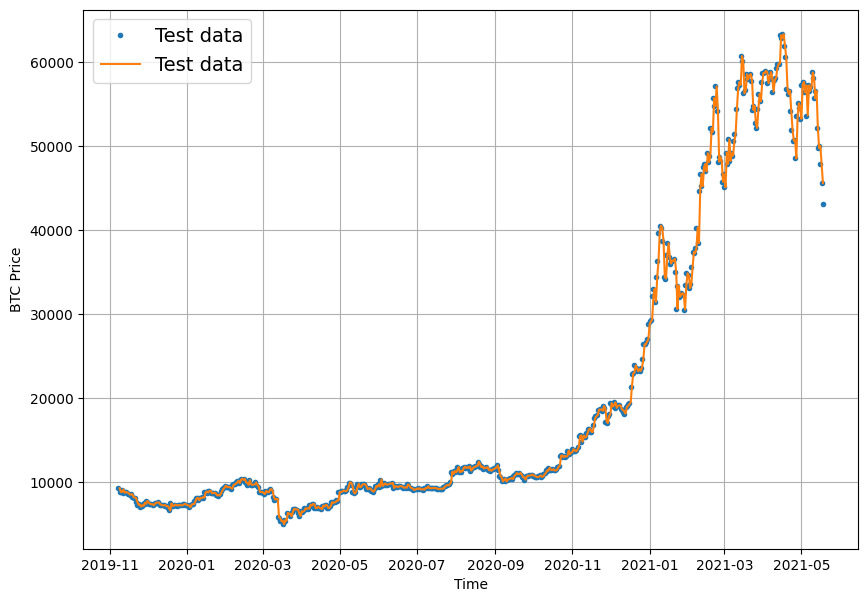

In [55]:
plt.figure(figsize=(10,7))
#plot_time_series(timesteps = X_train,values = y_train,label = "Train data")
plot_time_series(timesteps = X_test,values = y_test,format = '-',label = "Test data")
plot_time_series(timesteps = X_test[1:],values = naive_forecast,format = '-',
                 label = "Test data")


#Evalution metirc

* MEan absolute scaled erro (MASE)

In [57]:
#MASE implementation

def mean_abs_scaled_error(y_true,y_pred):
  '''
  Implement MASE (assuming no Seasonality)
  error>1 -forecast is worse than naive
  else better than naive
  '''

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  #Find MAE of naive forecase
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae / mae_naive_no_season

In [58]:
mean_abs_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [61]:
def evaluate_preds(y_true,y_pred):
  #Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred ,dtype = tf.float32)

  #calculate various evalution metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_abs_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [62]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results 

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}